In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import random

import warnings
warnings.filterwarnings('ignore')

# Reading the Data

In [2]:
hotel=pd.read_csv(r"C:\Users\piura\OneDrive\Desktop\hotel_bookings.csv (1).zip")

In [3]:
hotel.shape   #no of rows and columns

(119390, 32)

In [4]:
hotel.is_canceled.value_counts()  #value counts of target column

0    75166
1    44224
Name: is_canceled, dtype: int64

In [5]:
#hotel.info()

In [6]:
hotel.describe() #shows all the numerical columns in the data

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [7]:
hotel.shape

(119390, 32)

# Treating Missing Values

In [8]:
hotel.isnull().sum()  #no of null values

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [9]:
# country
hotel.country.value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

In [10]:
hotel.country=hotel.country.fillna("Not-Defined") #as don't know the country so filled with Not Defined

In [11]:
# agent
hotel.agent.value_counts()

9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
289.0        1
432.0        1
265.0        1
93.0         1
304.0        1
Name: agent, Length: 333, dtype: int64

In [12]:
hotel.agent=hotel.agent.fillna(hotel.agent.median()) 
#As agent is numerical column so filled with median as median is less sensitive to outliers than mean

In [13]:
# company
hotel.drop(columns="company",inplace=True)  #it has more 50% null values

In [14]:
# children
hotel.children.value_counts()

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

In [15]:
hotel.children=hotel.children.fillna(0.0) #Dont know the no. of children so filled with 0

In [16]:
hotel.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 


# Dtype Conversion

In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [18]:
hotel.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [19]:
#Hotel
hotel.hotel.value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [20]:
hotel.hotel=le.fit_transform(hotel.hotel)

In [21]:
hotel.hotel.value_counts()

0    79330
1    40060
Name: hotel, dtype: int64

arrival_date_month

In [22]:
#arrival_date_month
hotel.arrival_date_month.value_counts()

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

In [23]:
hotel.arrival_date_month=le.fit_transform(hotel.arrival_date_month)

In [24]:
hotel.arrival_date_month.value_counts()

1     13877
5     12661
8     11791
10    11160
0     11089
6     10939
11    10508
7      9794
3      8068
9      6794
2      6780
4      5929
Name: arrival_date_month, dtype: int64

In [25]:
# meal
hotel.meal.value_counts()

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

In [26]:
hotel.meal=le.fit_transform(hotel.meal)

In [27]:
hotel.meal.value_counts()

0    92310
2    14463
3    10650
4     1169
1      798
Name: meal, dtype: int64

In [28]:
# country
hotel.country.value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 178, dtype: int64

In [29]:
hotel.country=le.fit_transform(hotel.country)

In [30]:
hotel.country.value_counts()

136    48590
59     12129
56     10415
51      8568
43      7287
       ...  
44         1
27         1
70         1
173        1
119        1
Name: country, Length: 178, dtype: int64

In [31]:
# market_segment
hotel.market_segment.value_counts()

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

In [32]:
hotel.market_segment=le.fit_transform(hotel.market_segment)

In [33]:
hotel.market_segment.value_counts()

6    56477
5    24219
4    19811
3    12606
2     5295
1      743
0      237
7        2
Name: market_segment, dtype: int64

In [34]:
# distribution_channel
hotel.distribution_channel.value_counts()

TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64

In [35]:
hotel.distribution_channel=le.fit_transform(hotel.distribution_channel)

In [36]:
hotel.distribution_channel.value_counts()

3    97870
1    14645
0     6677
2      193
4        5
Name: distribution_channel, dtype: int64

In [37]:
# reserved_room_type
hotel.reserved_room_type.value_counts()

A    85994
D    19201
E     6535
F     2897
G     2094
B     1118
C      932
H      601
P       12
L        6
Name: reserved_room_type, dtype: int64

In [38]:
hotel.reserved_room_type=le.fit_transform(hotel.reserved_room_type)

In [39]:
hotel.reserved_room_type.value_counts()

0    85994
3    19201
4     6535
5     2897
6     2094
1     1118
2      932
7      601
9       12
8        6
Name: reserved_room_type, dtype: int64

In [40]:
# assigned_room_type
hotel.assigned_room_type.value_counts()

A    74053
D    25322
E     7806
F     3751
G     2553
C     2375
B     2163
H      712
I      363
K      279
P       12
L        1
Name: assigned_room_type, dtype: int64

In [41]:
hotel.assigned_room_type=le.fit_transform(hotel.assigned_room_type)

In [42]:
hotel.assigned_room_type.value_counts()

0     74053
3     25322
4      7806
5      3751
6      2553
2      2375
1      2163
7       712
8       363
9       279
11       12
10        1
Name: assigned_room_type, dtype: int64

In [43]:
# deposit_type
hotel.deposit_type.value_counts()

No Deposit    104641
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

In [44]:
hotel.deposit_type=le.fit_transform(hotel.deposit_type)

In [45]:
hotel.deposit_type.value_counts()

0    104641
1     14587
2       162
Name: deposit_type, dtype: int64

In [46]:
#customer_type.
hotel.customer_type.value_counts()

Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: customer_type, dtype: int64

In [47]:
hotel.customer_type=le.fit_transform(hotel.customer_type)

In [48]:
hotel.customer_type.value_counts()

2    89613
3    25124
0     4076
1      577
Name: customer_type, dtype: int64

In [49]:
#reservation_status
hotel.reservation_status.value_counts()

Check-Out    75166
Canceled     43017
No-Show       1207
Name: reservation_status, dtype: int64

In [50]:
hotel.reservation_status=le.fit_transform(hotel.reservation_status)

In [51]:
hotel.reservation_status.value_counts()

1    75166
0    43017
2     1207
Name: reservation_status, dtype: int64

In [52]:
# reservation_status_dat
hotel.reservation_status_date.value_counts()

2015-10-21    1461
2015-07-06     805
2016-11-25     790
2015-01-01     763
2016-01-18     625
              ... 
2015-02-27       1
2015-04-25       1
2015-03-11       1
2015-06-14       1
2015-02-12       1
Name: reservation_status_date, Length: 926, dtype: int64

In [53]:
hotel.reservation_status_date=le.fit_transform(hotel.reservation_status_date)                                      

In [54]:
hotel.reservation_status_date.value_counts()

233    1461
126     805
634     790
2       763
322     625
       ... 
25        1
64        1
32        1
106       1
17        1
Name: reservation_status_date, Length: 926, dtype: int64

In [55]:
hotel.dtypes

hotel                               int32
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                  int32
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                                int32
country                             int32
market_segment                      int32
distribution_channel                int32
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                  int32
assigned_room_type                  int32
booking_changes                     int64
deposit_type                        int32
agent                             

# Data Visualization

<AxesSubplot:xlabel='hotel', ylabel='count'>

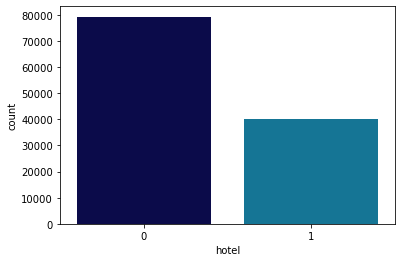

In [56]:
sns.countplot(data=hotel,x="hotel",palette="ocean")  # city hotel has more bookings than resort hotel

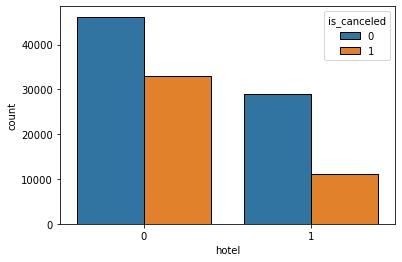

In [57]:
#Which Hotel has more camcelled booking   (0-City Hotel, 1-Resort Hotel)
sns.countplot(x="hotel",data=hotel,hue="is_canceled",edgecolor="black")
plt.show()                                            #1=canceled 0= not canceled

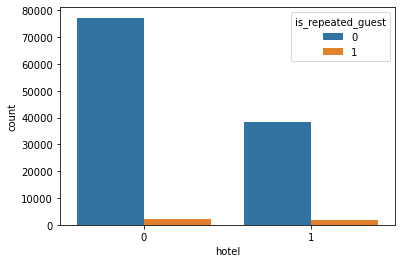

In [58]:
sns.countplot(data=hotel,x="hotel",hue="is_repeated_guest")  #0=not repeated 1= repeated
plt.show()

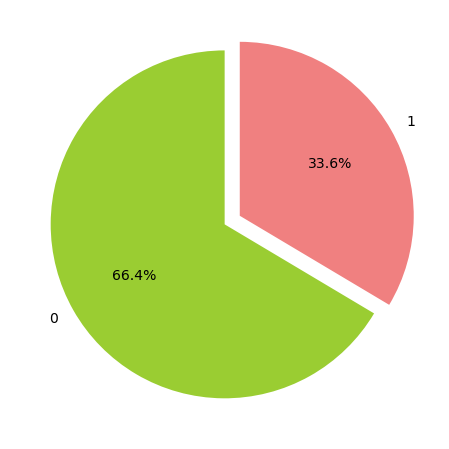

In [59]:
# Enlarging the pie chart
plt.rcParams['figure.figsize'] = 8,8

# Indexing labels. tolist() will convert the index to list for easy manipulation
labels = hotel['hotel'].value_counts().index.tolist()

# Convert value counts to list
sizes = hotel['hotel'].value_counts().tolist()

# As the name suggest, explode will determine how much each section is separated from each other 
explode = (0, 0.1)

# Determine colour of pie chart
colors = ['yellowgreen', 'lightcoral']

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})
plt.show()

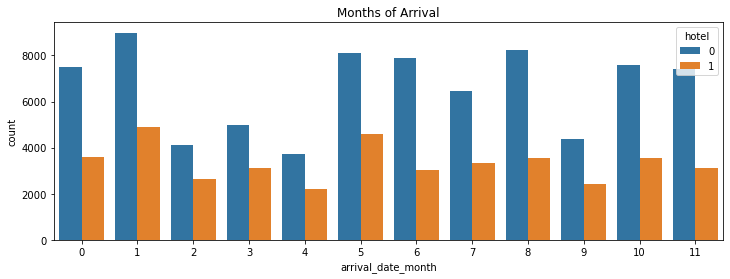

In [61]:
#Plotting the months against hotel type 
plt.figure(figsize=(12,4))    #0=City hotel ,1=resort hotel
sns.countplot(x='arrival_date_month', hue = 'hotel', data=hotel)
plt.title('Months of Arrival')
plt.show()

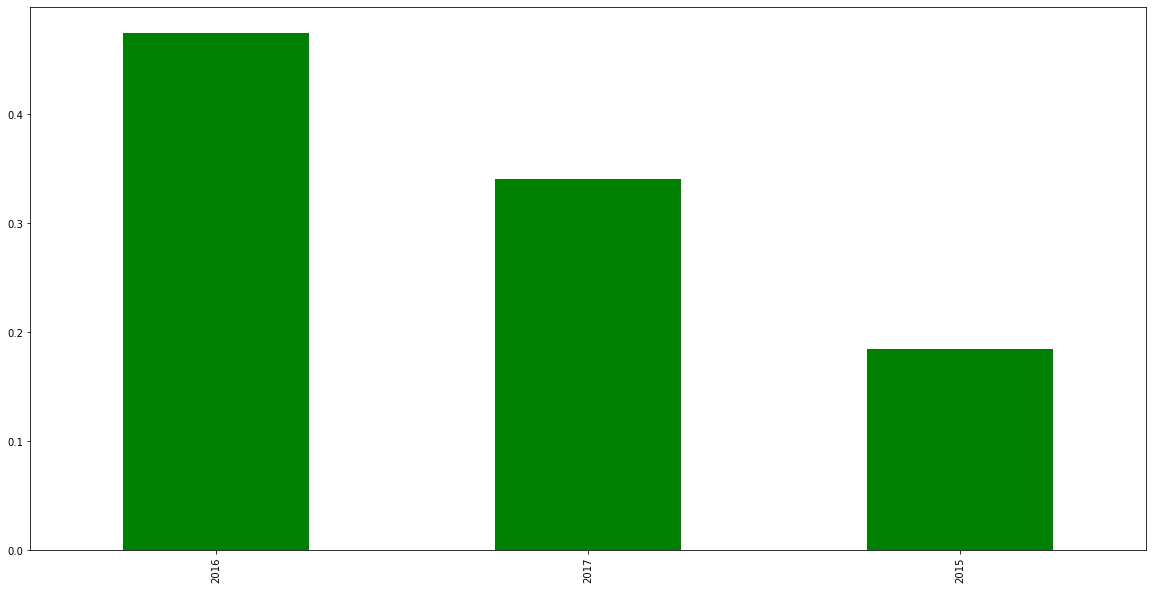

In [62]:
#the year in which most booked hotel
plt.figure(figsize=(20,10))
hotel.arrival_date_year.value_counts(normalize=True).plot(kind="bar",color='g')
plt.show()

# Model Building without treating outliers


In [63]:
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,0,342,2015,5,27,1,0,0,2,...,3,0,14.0,0,2,0.0,0,0,1,121
1,1,0,737,2015,5,27,1,0,0,2,...,4,0,14.0,0,2,0.0,0,0,1,121
2,1,0,7,2015,5,27,1,0,1,1,...,0,0,14.0,0,2,75.0,0,0,1,122
3,1,0,13,2015,5,27,1,0,1,1,...,0,0,304.0,0,2,75.0,0,0,1,122
4,1,0,14,2015,5,27,1,0,2,2,...,0,0,240.0,0,2,98.0,0,1,1,123


In [64]:
can=hotel["is_canceled"] # saving target column in variable

In [65]:
hotel=hotel.drop(["is_canceled"],axis=1) #droping the target column 

In [66]:
h_n=pd.concat([hotel,can],axis=1)  #concatenating the dependant and independant columns for moving the target column at last
h_n.head(2)                        #it is just for splitting purpose

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_canceled
0,1,342,2015,5,27,1,0,0,2,0.0,...,0,14.0,0,2,0.0,0,0,1,121,0
1,1,737,2015,5,27,1,0,0,2,0.0,...,0,14.0,0,2,0.0,0,0,1,121,0


In [67]:
# saperating dependant and independant columns
x=h_n.iloc[:,:-1]
y=h_n.iloc[:,-1]

In [68]:
x.head(2)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,342,2015,5,27,1,0,0,2,0.0,...,3,0,14.0,0,2,0.0,0,0,1,121
1,1,737,2015,5,27,1,0,0,2,0.0,...,4,0,14.0,0,2,0.0,0,0,1,121


In [69]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_canceled, dtype: int64

In [70]:
 from sklearn.model_selection import train_test_split

In [71]:
# splitting data into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

In [72]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((95512, 30), (23878, 30), (95512,), (23878,))

# 1. Logistic Regression

In [73]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [74]:
lg.fit(x_train,y_train)

LogisticRegression()

In [75]:
lg_p=lg.predict(x_test)
lg_p

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [76]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [77]:
lg_c=confusion_matrix(lg_p,y_test)
lg_c

array([[13263,  2849],
       [ 1766,  6000]], dtype=int64)

In [78]:
lg_ac=lg_c.diagonal().sum()/lg_c.sum()*100
lg_ac

80.67258564368875

In [79]:
print(classification_report(lg_p,y_test))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85     16112
           1       0.68      0.77      0.72      7766

    accuracy                           0.81     23878
   macro avg       0.78      0.80      0.79     23878
weighted avg       0.82      0.81      0.81     23878



In [80]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [81]:
lg_f=f1_score(y_test, lg_p, average="macro")
lg_pr=precision_score(y_test,lg_p, average="macro")
lg_r=recall_score(y_test,lg_p, average="macro")

# 2. Decision Tree

In [82]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [83]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [84]:
dt_p=dt.predict(x_test)
dt_p

array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

In [85]:
dt_c=confusion_matrix(dt_p,y_test)
dt_c

array([[15029,     0],
       [    0,  8849]], dtype=int64)

In [86]:
dt_ac=dt_c.diagonal().sum()/dt_c.sum()*100
dt_ac

100.0

In [87]:
print(classification_report(dt_p,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15029
           1       1.00      1.00      1.00      8849

    accuracy                           1.00     23878
   macro avg       1.00      1.00      1.00     23878
weighted avg       1.00      1.00      1.00     23878



In [88]:
dt_f=f1_score(y_test, dt_p, average="macro")
dt_pr=precision_score(y_test,dt_p, average="macro")
dt_r=recall_score(y_test,dt_p, average="macro")

# 3. Random Forest

In [89]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [90]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [91]:
rf_p=rf.predict(x_test)
rf_p

array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

In [92]:
rf_c=confusion_matrix(rf_p,y_test)
rf_c

array([[15029,     2],
       [    0,  8847]], dtype=int64)

In [93]:
rf_ac=rf_c.diagonal().sum()/rf_c.sum()*100
rf_ac

99.9916240891197

In [94]:
print(classification_report(rf_p,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15031
           1       1.00      1.00      1.00      8847

    accuracy                           1.00     23878
   macro avg       1.00      1.00      1.00     23878
weighted avg       1.00      1.00      1.00     23878



In [95]:
rf_f=f1_score(y_test, rf_p, average="macro")
rf_pr=precision_score(y_test,rf_p, average="macro")
rf_r=recall_score(y_test,rf_p, average="macro")

# 4. Boosting
# 4.1 Ada Boost

In [96]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [97]:
ab=AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=2)

In [98]:
ab.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=2)

In [99]:
ab_p=ab.predict(x_test)
ab_p

array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

In [100]:
ab_c=confusion_matrix(ab_p,y_test)
ab_c

array([[15029,     0],
       [    0,  8849]], dtype=int64)

In [101]:
ab_ac=ab_c.diagonal().sum()/ab_c.sum()*100
ab_ac

100.0

In [102]:
print(classification_report(ab_p,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15029
           1       1.00      1.00      1.00      8849

    accuracy                           1.00     23878
   macro avg       1.00      1.00      1.00     23878
weighted avg       1.00      1.00      1.00     23878



In [103]:
ab_f=f1_score(y_test, ab_p, average="macro")
ab_pr=precision_score(y_test,ab_p, average="macro")
ab_r=recall_score(y_test,ab_p, average="macro")

# 4.2 XG Boost

In [104]:
from xgboost import XGBClassifier
xg=XGBClassifier()

In [105]:
xg.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [106]:
xg_p=xg.predict(x_test)
xg_p

array([1, 0, 1, ..., 0, 1, 1])

In [107]:
xg_c=confusion_matrix(xg_p,y_test)
xg_c

array([[15029,     0],
       [    0,  8849]], dtype=int64)

In [108]:
xg_ac=xg_c.diagonal().sum()/xg_c.sum()*100
xg_ac

100.0

In [109]:
print(classification_report(xg_p,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15029
           1       1.00      1.00      1.00      8849

    accuracy                           1.00     23878
   macro avg       1.00      1.00      1.00     23878
weighted avg       1.00      1.00      1.00     23878



In [110]:
xg_f=f1_score(y_test, xg_p, average="macro")
xg_pr=precision_score(y_test,xg_p, average="macro")
xg_r=recall_score(y_test,xg_p, average="macro")

# 5. SVM

In [111]:
from sklearn.svm import SVC
sv=SVC() 

In [112]:
sv.fit(x_train,y_train)

SVC()

In [113]:
sv_p=sv.predict(x_test)
sv_p

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [114]:
sv_c=confusion_matrix(sv_p,y_test)
sv_c

array([[14190,  5903],
       [  839,  2946]], dtype=int64)

In [115]:
sv_ac=sv_c.diagonal().sum()/sv_c.sum()*100
sv_ac

71.76480442248095

In [116]:
print(classification_report(sv_p,y_test))

              precision    recall  f1-score   support

           0       0.94      0.71      0.81     20093
           1       0.33      0.78      0.47      3785

    accuracy                           0.72     23878
   macro avg       0.64      0.74      0.64     23878
weighted avg       0.85      0.72      0.75     23878



In [117]:
sv_f=f1_score(y_test, sv_p, average="macro")
sv_pr=precision_score(y_test,sv_p, average="macro")
sv_r=recall_score(y_test,sv_p, average="macro")

# 6. KNN

In [118]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier(n_neighbors=24)

In [119]:
kn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=24)

In [120]:
kn_p=kn.predict(x_test)
kn_p

array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

In [121]:
kn_c=confusion_matrix(kn_p,y_test)
kn_c

array([[14312,  2599],
       [  717,  6250]], dtype=int64)

In [122]:
kn_ac=kn_c.diagonal().sum()/kn_c.sum()*100
kn_ac

86.11273976044896

In [123]:
print(classification_report(kn_p,y_test))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90     16911
           1       0.71      0.90      0.79      6967

    accuracy                           0.86     23878
   macro avg       0.83      0.87      0.84     23878
weighted avg       0.88      0.86      0.87     23878



In [124]:
#AUC ROC curve 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 
#As the values of TrueNegetives are less than the values of True positives therefore using AUC ROC Curve

In [125]:
roc=roc_auc_score(kn_p,y_test) 
roc

0.8716996572461013

In [126]:
kn_prob=kn.predict_proba(x_test)

In [127]:
df=pd.DataFrame(kn_prob)
df

,0,1
0,0.458333,0.541667
1,1.000000,0.000000
2,0.083333,0.916667
3,0.000000,1.000000
4,0.083333,0.916667
...,...,...
23873,0.875000,0.125000
23874,0.875000,0.125000
23875,1.000000,0.000000
23876,0.000000,1.000000


In [128]:
fpr,tpr,threshold=roc_curve(y_test,df.iloc[:,1])

Text(0.5, 1.0, 'AUC-ROC Curve')

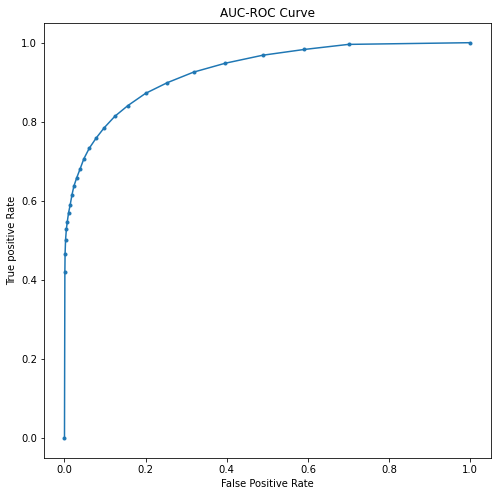

In [129]:
plt.plot(fpr,tpr,marker=".")
plt.xlabel("False Positive Rate")
plt.ylabel("True positive Rate")
plt.title("AUC-ROC Curve")

In [130]:
kn_f=f1_score(y_test, kn_p, average="macro")
kn_pr=precision_score(y_test,kn_p, average="macro")
kn_r=recall_score(y_test,kn_p, average="macro")

# 7. Naive Bayes

In [131]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [132]:
from sklearn.preprocessing import MinMaxScaler #fixed import

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [133]:
nb.fit(x_train,y_train)

MultinomialNB()

In [134]:
nb_p=nb.predict(x_test)
nb_p

array([0, 0, 1, ..., 0, 1, 1], dtype=int64)

In [135]:
nb_c=confusion_matrix(nb_p,y_test)
nb_c

array([[14989,  4330],
       [   40,  4519]], dtype=int64)

In [136]:

nb_ac=nb_c.diagonal().sum()/nb_c.sum()*100
nb_ac

81.6986347265265

In [137]:
print(classification_report(nb_p,y_test))

              precision    recall  f1-score   support

           0       1.00      0.78      0.87     19319
           1       0.51      0.99      0.67      4559

    accuracy                           0.82     23878
   macro avg       0.75      0.88      0.77     23878
weighted avg       0.90      0.82      0.83     23878



In [138]:
nb_f=f1_score(y_test, nb_p, average="macro")
nb_pr=precision_score(y_test,nb_p, average="macro")
nb_r=recall_score(y_test,nb_p, average="macro")

# Conclusion

In [139]:
list1=["Logistic Regression","Decision Tree","Random Forest","Ada Boost","XG Boost","SVM","KNN","Naive Bayes"] 
list2=[lg_ac,dt_ac,rf_ac,ab_ac,xg_ac,sv_ac,kn_ac,nb_ac]   
list3=[lg_pr,dt_pr,rf_pr,ab_pr,xg_pr,sv_pr,kn_pr,nb_pr]
list4=[lg_r,dt_r,rf_r,ab_r,xg_r,sv_r,kn_r,nb_r]
list5=[lg_f,dt_f,rf_f,ab_f,xg_f,sv_f,kn_f,nb_f]

In [140]:
df=pd.DataFrame({"Model Name":list1, "Accuracy":list2, "Precision":list3, "Recall":list4, "F1-Score":list5})
df

,Model Name,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,80.672586,0.797887,0.780268,0.787021
1,Decision Tree,100.000000,1.000000,1.000000,1.000000
2,Random Forest,99.991624,0.999933,0.999887,0.999910
3,Ada Boost,100.000000,1.000000,1.000000,1.000000
4,XG Boost,100.000000,1.000000,1.000000,1.000000
5,SVM,71.764804,0.742276,0.638547,0.637201
6,KNN,86.112740,0.871700,0.829293,0.843260
7,Naive Bayes,81.698635,0.883547,0.754009,0.773424


# Class Imbalance Treatment using Random Under Sampling

In [141]:
c_0,c_1=h_n["is_canceled"].value_counts()
c_0,c_1 #saving categorical values of target columns in variables

(75166, 44224)

In [142]:
h_0=h_n[h_n["is_canceled"]==0]
h_1=h_n[h_n["is_canceled"]==1]

In [143]:
h_0.shape,h_1.shape

((75166, 31), (44224, 31))

In [144]:
class_0under=h_0.sample(c_1)


In [145]:
class0_1=pd.concat([class_0under,h_1],axis=0)
class0_1

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_canceled
20349,1,0,2016,4,5,25,1,0,1,0.0,...,0,240.0,0,2,40.00,0,0,1,330,0
97186,0,13,2016,11,38,11,2,0,2,0.0,...,0,14.0,0,2,95.38,0,0,1,561,0
8733,1,364,2016,10,42,12,0,4,2,0.0,...,0,14.0,0,3,66.00,0,0,1,594,0
103974,0,269,2016,2,53,29,2,3,1,0.0,...,0,12.0,0,3,70.00,0,0,1,673,0
117429,0,99,2017,5,31,31,1,3,3,0.0,...,0,9.0,0,2,195.00,0,1,1,886,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110280,0,132,2017,0,17,25,0,0,0,0.0,...,0,9.0,0,2,0.00,0,3,0,785,1
111355,0,4,2017,6,23,5,1,0,1,0.0,...,0,14.0,0,2,65.00,0,0,0,826,1
111924,0,7,2017,8,22,31,0,1,1,0.0,...,0,14.0,0,2,65.00,0,0,0,821,1
111925,0,6,2017,5,29,17,1,0,1,0.0,...,0,14.0,0,2,65.00,0,0,2,868,1


In [146]:
class0_1.is_canceled.value_counts()
#Random Under sampling balance the class distribution by randomly eliminating majority class values
#As data is having large no of rows it also helps to reduce execution time

0    44224
1    44224
Name: is_canceled, dtype: int64

# Outlier Treatment

In [147]:
class0_1.columns

Index(['hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'is_canceled'],
      dtype='object')

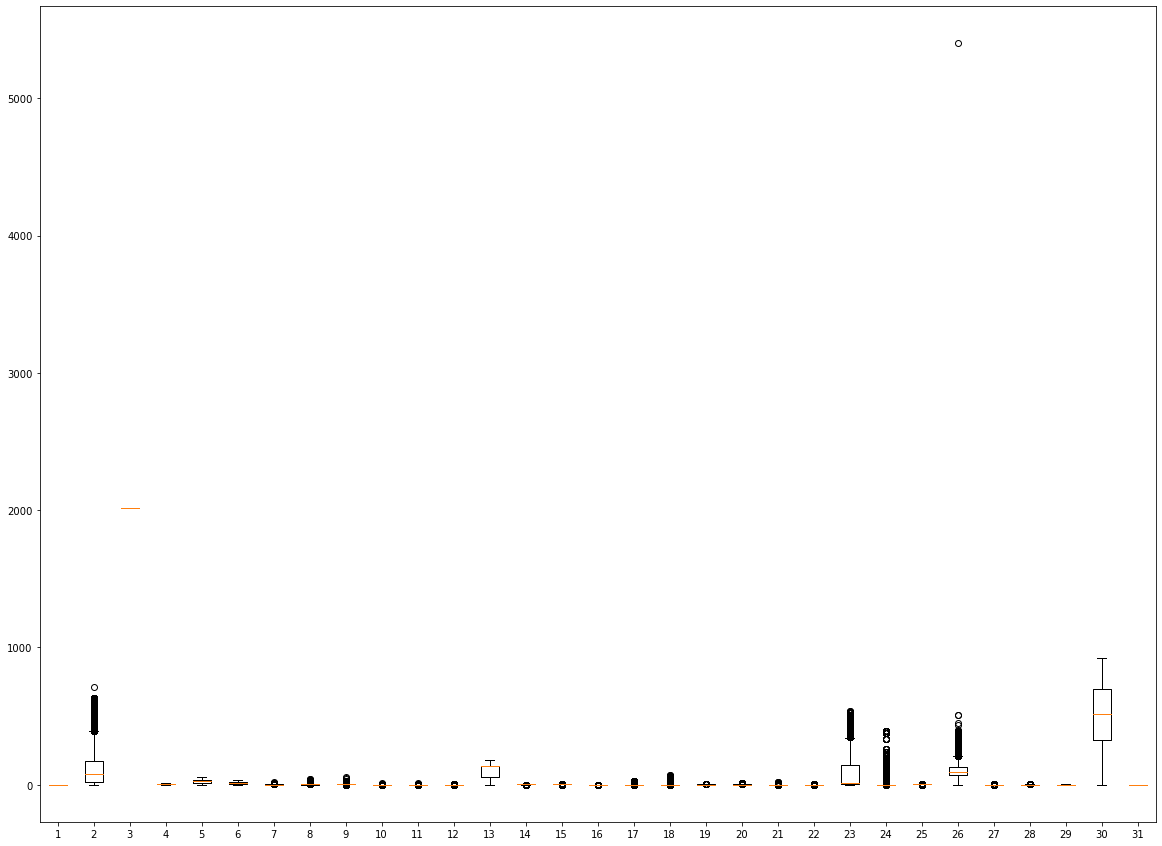

In [148]:
plt.figure(figsize=(20,15))
plt.boxplot(class0_1)
plt.show()

# lead_time

In [149]:
class0_1.lead_time.value_counts()     

0      3909
1      2153
2      1322
3      1151
4      1080
       ... 
532       1
709       1
435       1
371       1
380       1
Name: lead_time, Length: 477, dtype: int64

<AxesSubplot:xlabel='lead_time'>

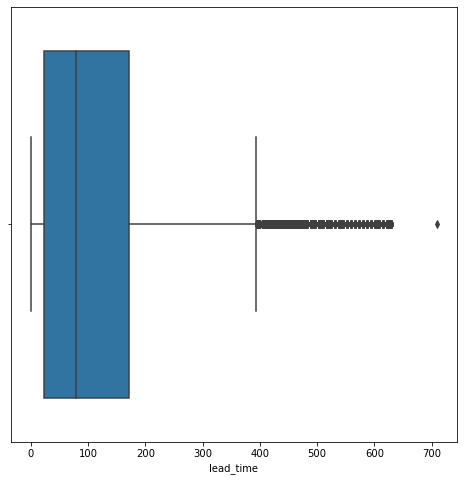

In [150]:
sns.boxplot(class0_1.lead_time)

<AxesSubplot:xlabel='lead_time', ylabel='Density'>

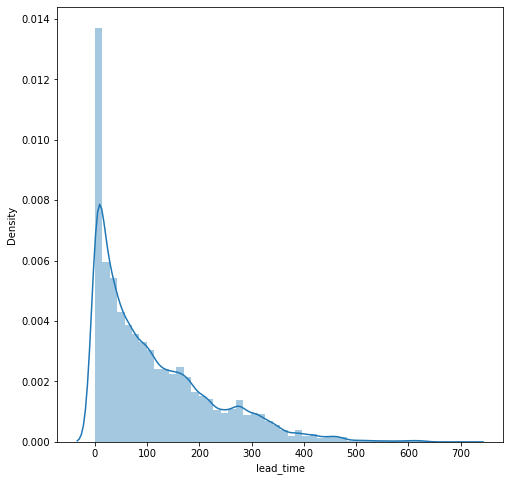

In [151]:
sns.distplot(class0_1.lead_time)

In [152]:
class0_1.lead_time.describe()

count    88448.000000
mean       112.337701
std        110.536996
min          0.000000
25%         23.000000
50%         78.000000
75%        171.000000
max        709.000000
Name: lead_time, dtype: float64

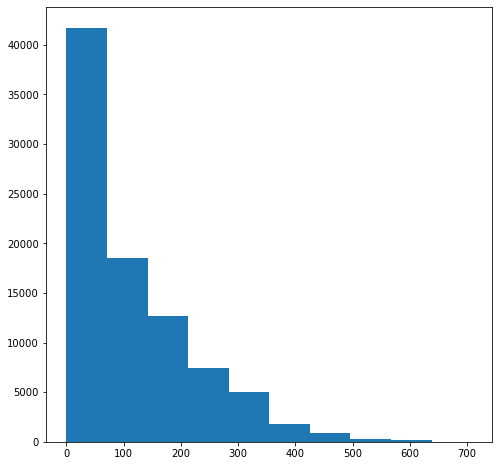

In [153]:
plt.hist(class0_1.lead_time)
plt.show()

In [154]:
iqr=class0_1.lead_time.quantile(0.75)-class0_1.lead_time.quantile(0.25)
iqr #As the data is skewed iqr technique is used

148.0

In [155]:
lb=class0_1["lead_time"].quantile(0.25)-(iqr*3)
ub=class0_1["lead_time"].quantile(0.75)+(iqr*3)
print(lb,ub)

-421.0 615.0


In [156]:
class0_1.loc[class0_1["lead_time"]>615,"lead_time"]=615 #outliers are above the maxima therefore upper boundary value is used

# agent

In [157]:
class0_1.agent.value_counts()

9.0      24263
14.0     13700
240.0    10472
1.0       6384
6.0       2368
         ...  
371.0        1
299.0        1
367.0        1
321.0        1
454.0        1
Name: agent, Length: 312, dtype: int64

<AxesSubplot:xlabel='agent'>

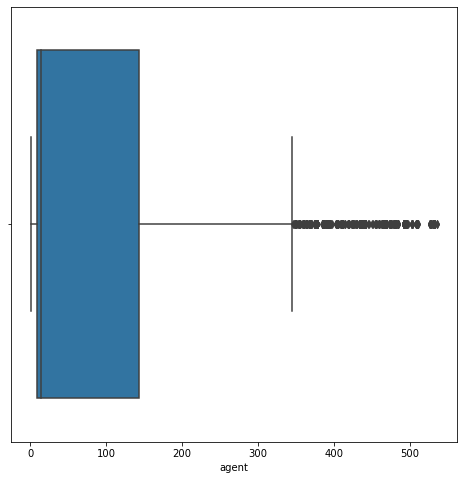

In [158]:
sns.boxplot(class0_1.agent)

<AxesSubplot:xlabel='agent', ylabel='Density'>

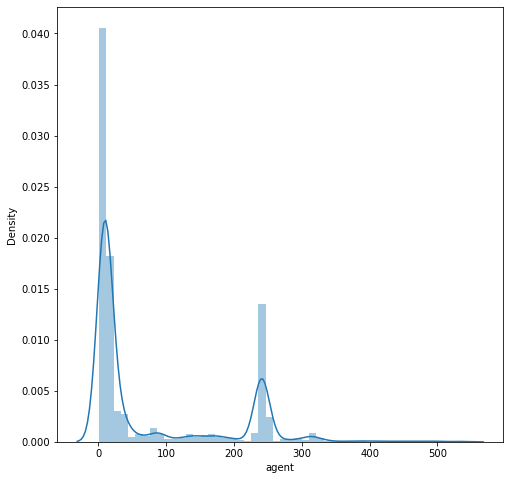

In [159]:
sns.distplot(class0_1.agent)

In [160]:
class0_1.agent.describe()

count    88448.000000
mean        75.330646
std        105.055956
min          1.000000
25%          9.000000
50%         14.000000
75%        143.000000
max        535.000000
Name: agent, dtype: float64

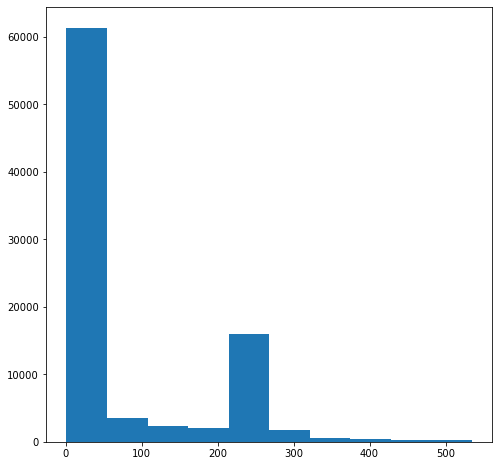

In [161]:
plt.hist(class0_1.agent)
plt.show()

In [162]:
iqr=class0_1.agent.quantile(0.75)-class0_1.agent.quantile(0.25)
iqr

134.0

In [163]:
lb=class0_1["agent"].quantile(0.25)-(iqr*3)
ub=class0_1["agent"].quantile(0.75)+(iqr*3)
print(lb,ub)

-393.0 545.0


In [164]:
class0_1.loc[class0_1["agent"]>545,"agent"]=545

# adr

In [165]:
class0_1.adr.value_counts()

62.00     3445
75.00     2132
90.00     2079
65.00     1760
80.00     1548
          ... 
228.89       1
61.21        1
29.80        1
260.40       1
56.80        1
Name: adr, Length: 7431, dtype: int64

<AxesSubplot:xlabel='adr'>

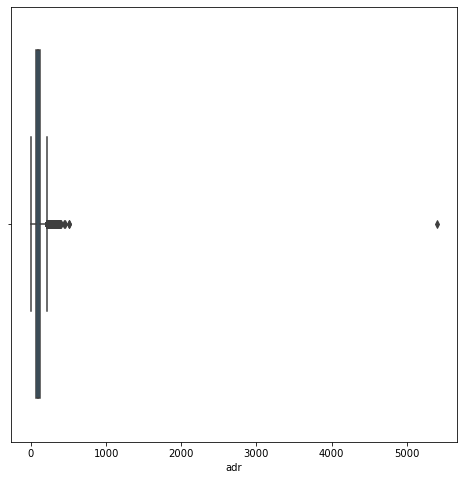

In [166]:
sns.boxplot(class0_1.adr)

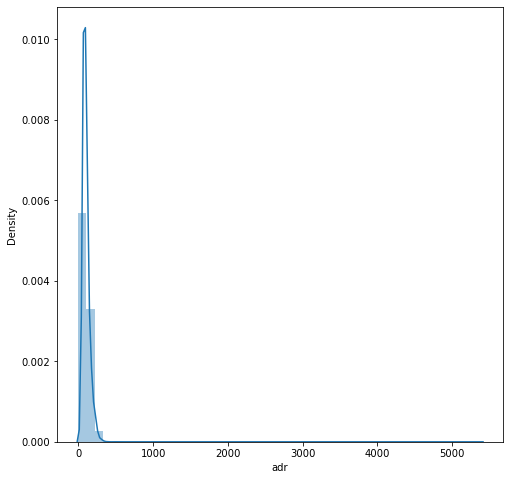

In [167]:
sns.distplot(class0_1.adr)
plt.show()

In [168]:
class0_1.adr.describe()

count    88448.000000
mean       102.432875
std         51.022033
min          0.000000
25%         70.000000
50%         95.000000
75%        126.000000
max       5400.000000
Name: adr, dtype: float64

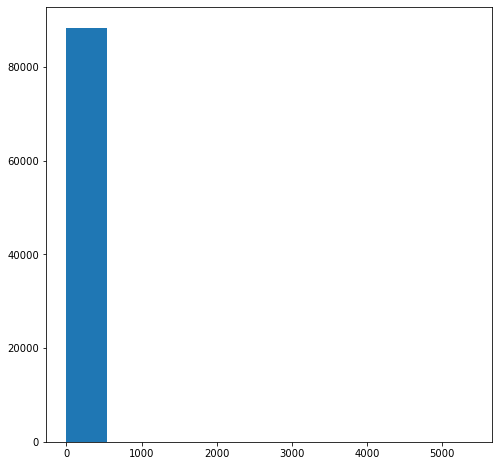

In [169]:
plt.hist(class0_1.adr)
plt.show()

In [170]:
iqr=class0_1.adr.quantile(0.75)-class0_1.adr.quantile(0.25)
iqr

56.0

In [171]:
lb=class0_1["adr"].quantile(0.25)-(iqr*3)
ub=class0_1["adr"].quantile(0.75)+(iqr*3)
print(lb,ub)

-98.0 294.0


In [172]:
class0_1.loc[class0_1["adr"]>294,"adr"]=294

# Data Transformation

# lead_time

In [173]:
class0_1.loc[class0_1["lead_time"]==0] # zero values are present therefore using square root transformation

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_canceled
20349,1,0,2016,4,5,25,1,0,1,0.0,...,0,240.0,0,2,40.0,0,0,1,330,0
20204,1,0,2016,4,4,19,0,1,2,0.0,...,0,14.0,0,2,45.0,0,1,1,324,0
97886,0,0,2016,11,39,21,0,1,2,0.0,...,0,14.0,0,2,70.0,1,0,1,570,0
81421,0,0,2016,6,25,14,0,1,2,0.0,...,0,14.0,0,2,50.0,0,0,1,471,0
88780,0,0,2017,8,20,15,1,0,1,0.0,...,0,14.0,0,2,95.0,1,2,1,806,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98809,0,0,2016,2,51,12,1,0,2,0.0,...,0,341.0,0,2,77.0,0,2,0,651,1
98810,0,0,2016,2,51,12,1,0,2,0.0,...,0,341.0,0,2,0.0,0,2,0,651,1
101930,0,0,2017,6,26,29,0,1,2,0.0,...,0,45.0,0,2,0.0,0,0,0,850,1
105909,0,0,2017,0,16,18,0,1,1,0.0,...,0,14.0,0,2,0.0,0,2,0,778,1


<AxesSubplot:xlabel='lead_time', ylabel='Density'>

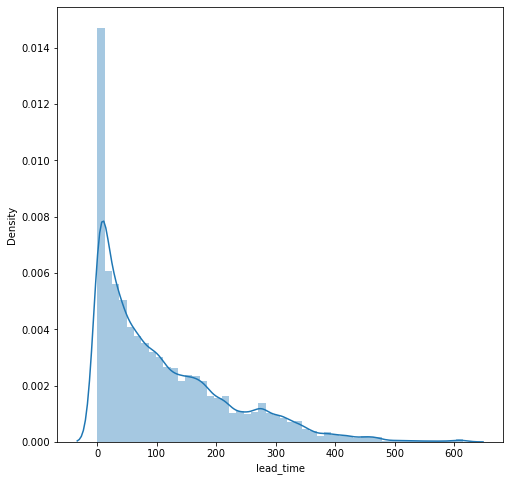

In [174]:
sns.distplot(class0_1.lead_time)

In [175]:
class0_1.lead_time.skew()

1.2671461141925167

In [176]:
class0_1.lead_time=np.sqrt(class0_1.lead_time) #As zero values are present in column therefore square root method is used

In [177]:
class0_1.lead_time.skew()

0.23676668314983831

<AxesSubplot:xlabel='lead_time', ylabel='Density'>

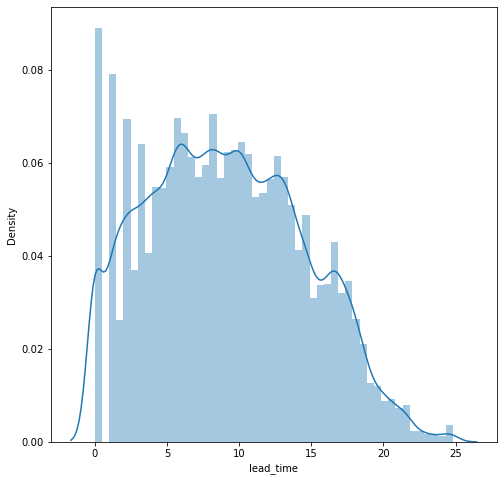

In [178]:
sns.distplot(class0_1.lead_time)

# agent

In [179]:
class0_1.loc[class0_1["agent"]==0] # no zero values are present therefore using log transformation

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_canceled


<AxesSubplot:xlabel='agent', ylabel='Density'>

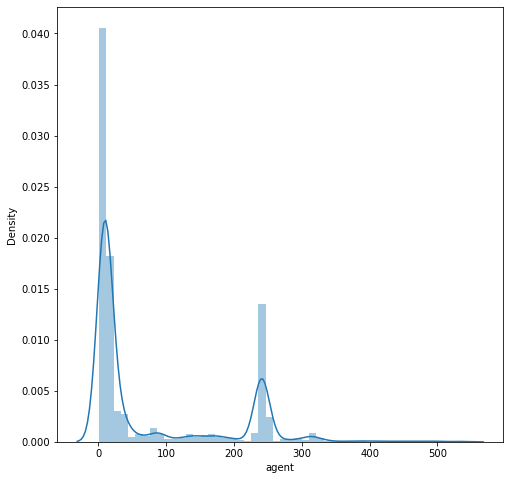

In [180]:
sns.distplot(class0_1.agent)

In [181]:
class0_1.agent.skew()

1.3367637960731997

In [182]:
class0_1.agent=np.log(class0_1.agent)

In [183]:
class0_1.agent.skew()

0.17100704668285163

In [184]:
#sns.distplot(class0_1.agent)

In [185]:
class0_1.skew() # range of skewness is -1 to 1

hotel                              0.776070
lead_time                          0.236767
arrival_date_year                 -0.239365
arrival_date_month                -0.046828
arrival_date_week_number          -0.008894
arrival_date_day_of_month          0.003676
stays_in_weekend_nights            1.390958
stays_in_week_nights               2.896988
adults                            22.317141
children                           4.130269
babies                            31.921657
meal                               1.600123
country                           -0.303513
market_segment                    -0.996357
distribution_channel              -2.041406
is_repeated_guest                  5.689202
previous_cancellations            21.762651
previous_bookings_not_canceled    25.539745
reserved_room_type                 1.491666
assigned_room_type                 1.245506
booking_changes                    6.570186
deposit_type                       1.852628
agent                           

# Splitting the data

In [186]:
u_x=class0_1.iloc[:,0:-1]
u_y=class0_1.iloc[:,-1]

In [187]:
u_x

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
20349,1,0.000000,2016,4,5,25,1,0,1,0.0,...,0,0,5.480639,0,2,40.00,0,0,1,330
97186,0,3.605551,2016,11,38,11,2,0,2,0.0,...,2,0,2.639057,0,2,95.38,0,0,1,561
8733,1,19.078784,2016,10,42,12,0,4,2,0.0,...,3,0,2.639057,0,3,66.00,0,0,1,594
103974,0,16.401219,2016,2,53,29,2,3,1,0.0,...,0,0,2.484907,0,3,70.00,0,0,1,673
117429,0,9.949874,2017,5,31,31,1,3,3,0.0,...,0,0,2.197225,0,2,195.00,0,1,1,886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110280,0,11.489125,2017,0,17,25,0,0,0,0.0,...,1,0,2.197225,0,2,0.00,0,3,0,785
111355,0,2.000000,2017,6,23,5,1,0,1,0.0,...,0,0,2.639057,0,2,65.00,0,0,0,826
111924,0,2.645751,2017,8,22,31,0,1,1,0.0,...,0,0,2.639057,0,2,65.00,0,0,0,821
111925,0,2.449490,2017,5,29,17,1,0,1,0.0,...,0,0,2.639057,0,2,65.00,0,0,2,868


In [188]:
u_x_train,u_x_test,u_y_train,u_y_test=train_test_split(u_x,u_y,test_size=0.2,random_state=100)

In [189]:
u_x_train.shape,u_x_test.shape,u_y_train.shape,u_y_test.shape

((70758, 30), (17690, 30), (70758,), (17690,))



# Feature Selection

# Random forest

In [190]:
rf.fit(u_x_train,u_y_train)

RandomForestClassifier()

In [191]:
rf.feature_importances_

array([1.32644234e-03, 2.74518674e-02, 4.03327856e-03, 1.78889550e-03,
       3.95588953e-03, 2.27206783e-03, 1.43517746e-03, 2.30719238e-03,
       9.08623430e-04, 4.81466638e-04, 4.42079370e-05, 8.17035291e-04,
       3.44447216e-02, 2.04871376e-02, 2.87978348e-03, 5.87933757e-04,
       1.34785945e-02, 1.67375319e-03, 2.35657976e-03, 5.95300441e-03,
       7.17790538e-03, 6.10060386e-02, 1.14868598e-02, 2.76325911e-04,
       4.54541972e-03, 6.07783292e-03, 1.11427737e-02, 2.05845678e-02,
       7.32945662e-01, 1.60729621e-02])

In [192]:
df1=pd.DataFrame({"Importances":list(rf.feature_importances_),"Columns":list(x)})
df1

,Importances,Columns
0,0.001326,hotel
1,0.027452,lead_time
2,0.004033,arrival_date_year
3,0.001789,arrival_date_month
4,0.003956,arrival_date_week_number
5,0.002272,arrival_date_day_of_month
6,0.001435,stays_in_weekend_nights
7,0.002307,stays_in_week_nights
8,0.000909,adults
9,0.000481,children


In [193]:
# All features are important

# Model building after treating Outliers


# 1. Logistic Regression

In [194]:
lg.fit(u_x_train,u_y_train)

LogisticRegression()

In [195]:
lg_p1=lg.predict(u_x_test)
lg_p1

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

In [196]:
lg_c1=confusion_matrix(lg_p1,u_y_test)
lg_c1

array([[6964, 1877],
       [1888, 6961]], dtype=int64)

In [197]:
lg_ac1=lg_c1.diagonal().sum()/lg_c1.sum()*100
lg_ac1

78.7167891464104

In [198]:
print(classification_report(lg_p1,u_y_test))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79      8841
           1       0.79      0.79      0.79      8849

    accuracy                           0.79     17690
   macro avg       0.79      0.79      0.79     17690
weighted avg       0.79      0.79      0.79     17690



In [199]:
lg_f1=f1_score(u_y_test, lg_p1, average="macro")
lg_pr1=precision_score(u_y_test,lg_p1, average="macro")
lg_r1=recall_score(u_y_test,lg_p1, average="macro")

# 2. Decision Tree

In [200]:
dt.fit(u_x_train,u_y_train)

DecisionTreeClassifier()

In [201]:
dt_p1=dt.predict(u_x_test)
dt_p1

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

In [202]:
dt_c1=confusion_matrix(dt_p1,u_y_test)
dt_c1

array([[8852,    0],
       [   0, 8838]], dtype=int64)

In [203]:
dt_ac1=dt_c1.diagonal().sum()/dt_c1.sum()*100
dt_ac1

100.0

In [204]:
print(classification_report(dt_p1,u_y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8852
           1       1.00      1.00      1.00      8838

    accuracy                           1.00     17690
   macro avg       1.00      1.00      1.00     17690
weighted avg       1.00      1.00      1.00     17690



In [205]:
dt_f1=f1_score(u_y_test, dt_p1, average="macro")
dt_pr1=precision_score(u_y_test,dt_p1, average="macro")
dt_r1=recall_score(u_y_test,dt_p1, average="macro")

# 3. Random Forest

In [206]:
rf.fit(u_x_train,u_y_train)

RandomForestClassifier()

In [207]:
rf_p1=rf.predict(u_x_test)
rf_p1

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

In [208]:
rf_c1=confusion_matrix(rf_p1,u_y_test)
rf_c1

array([[8852,    1],
       [   0, 8837]], dtype=int64)

In [209]:
rf_ac1=rf_c1.diagonal().sum()/rf_c1.sum()*100
rf_ac1

99.9943470887507

In [210]:
print(classification_report(rf_p1,u_y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8853
           1       1.00      1.00      1.00      8837

    accuracy                           1.00     17690
   macro avg       1.00      1.00      1.00     17690
weighted avg       1.00      1.00      1.00     17690



In [211]:
rf_f1=f1_score(u_y_test, rf_p1, average="macro")
rf_pr1=precision_score(u_y_test,rf_p1, average="macro")
rf_r1=recall_score(u_y_test,rf_p1, average="macro")

# 4. Boosting
# 4.1 Ada Boost

In [212]:
ab.fit(u_x_train,u_y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=2)

In [213]:
ab_p1=ab.predict(u_x_test)
ab_p1

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

In [214]:
ab_c1=confusion_matrix(ab_p1,u_y_test)
ab_c1

array([[8852,    0],
       [   0, 8838]], dtype=int64)

In [215]:
ab_ac1=ab_c1.diagonal().sum()/ab_c1.sum()*100
ab_ac1

100.0

In [216]:
print(classification_report(ab_p1,u_y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8852
           1       1.00      1.00      1.00      8838

    accuracy                           1.00     17690
   macro avg       1.00      1.00      1.00     17690
weighted avg       1.00      1.00      1.00     17690



In [217]:
ab_f1=f1_score(u_y_test, ab_p1, average="macro")
ab_pr1=precision_score(u_y_test,ab_p1, average="macro")
ab_r1=recall_score(u_y_test,ab_p1, average="macro")

# 4.2 XG Boost

In [218]:
xg.fit(u_x_train,u_y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [219]:
xg_p1=xg.predict(u_x_test)
xg_p1

array([0, 1, 1, ..., 1, 1, 0])

In [220]:
xg_c1=confusion_matrix(xg_p1,u_y_test)
xg_c1

array([[8852,    0],
       [   0, 8838]], dtype=int64)

In [221]:
xg_ac1=xg_c1.diagonal().sum()/xg_c1.sum()*100
xg_ac1

100.0

In [222]:
print(classification_report(xg_p1,u_y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8852
           1       1.00      1.00      1.00      8838

    accuracy                           1.00     17690
   macro avg       1.00      1.00      1.00     17690
weighted avg       1.00      1.00      1.00     17690



In [223]:
xg_f1=f1_score(u_y_test, xg_p1, average="macro")
xg_pr1=precision_score(u_y_test,xg_p1, average="macro")
xg_r1=recall_score(u_y_test,xg_p1, average="macro")

# 5. SVM

In [224]:
sv.fit(u_x_train,u_y_train)

SVC()

In [225]:
sv_p1=sv.predict(u_x_test)
sv_p1

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [226]:
sv_c1=confusion_matrix(sv_p1,u_y_test)
sv_c1

array([[5737, 2752],
       [3115, 6086]], dtype=int64)

In [227]:
sv_ac1=sv_c1.diagonal().sum()/sv_c1.sum()*100
sv_ac1

66.8343697003957

In [228]:
print(classification_report(sv_p1,u_y_test))

              precision    recall  f1-score   support

           0       0.65      0.68      0.66      8489
           1       0.69      0.66      0.67      9201

    accuracy                           0.67     17690
   macro avg       0.67      0.67      0.67     17690
weighted avg       0.67      0.67      0.67     17690



In [229]:
sv_f1=f1_score(u_y_test, sv_p1, average="macro")
sv_pr1=precision_score(u_y_test,sv_p1, average="macro")
sv_r1=recall_score(u_y_test,sv_p1, average="macro")

# 6. KNN

In [230]:
kn.fit(u_x_train,u_y_train)

KNeighborsClassifier(n_neighbors=24)

In [231]:
kn_p1=kn.predict(u_x_test)
kn_p1

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

In [232]:
kn_c1=confusion_matrix(kn_p1,u_y_test)
kn_c1

array([[8356, 1880],
       [ 496, 6958]], dtype=int64)

In [233]:
kn_ac1=kn_c1.diagonal().sum()/kn_c1.sum()*100
kn_ac1

86.56868287167892

In [234]:
print(classification_report(kn_p1,u_y_test))

              precision    recall  f1-score   support

           0       0.94      0.82      0.88     10236
           1       0.79      0.93      0.85      7454

    accuracy                           0.87     17690
   macro avg       0.87      0.87      0.86     17690
weighted avg       0.88      0.87      0.87     17690



In [235]:
kn_f1=f1_score(u_y_test, kn_p1, average="macro")
kn_pr1=precision_score(u_y_test,kn_p1, average="macro")
kn_r1=recall_score(u_y_test,kn_p1, average="macro")

# 7. Naive Bayes

In [236]:
#as some columns in data contain negetive values and minmaxscaler takes positive value so we have used this syntax
from sklearn.preprocessing import MinMaxScaler #fixed import
scaler = MinMaxScaler()
u_x_train = scaler.fit_transform(u_x_train)  
u_x_test = scaler.transform(u_x_test) 

In [237]:
nb.fit(u_x_train,u_y_train) 

MultinomialNB()

In [238]:
nb_p1=nb.predict(u_x_test)
nb_p1 

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

In [239]:
nb_c1=confusion_matrix(nb_p1,u_y_test)
nb_c1 

array([[8819, 1097],
       [  33, 7741]], dtype=int64)

In [240]:
nb_ac1=nb_c1.diagonal().sum()/nb_c1.sum()*100
nb_ac1 

93.61221028829847

In [241]:
print(classification_report(nb_p1,u_y_test)) 

              precision    recall  f1-score   support

           0       1.00      0.89      0.94      9916
           1       0.88      1.00      0.93      7774

    accuracy                           0.94     17690
   macro avg       0.94      0.94      0.94     17690
weighted avg       0.94      0.94      0.94     17690



In [242]:
roc_n=roc_auc_score(nb_p1,u_y_test)
roc_n

0.9425628975184708

In [243]:
nb1_prob=nb.predict_proba(u_x_test)

In [244]:
df_n=pd.DataFrame(nb1_prob)
df_n

,0,1
0,0.827811,0.172189
1,0.061187,0.938813
2,0.041479,0.958521
3,0.045293,0.954707
4,0.762989,0.237011
...,...,...
17685,0.397961,0.602039
17686,0.041479,0.958521
17687,0.041935,0.958065
17688,0.043363,0.956637


In [245]:
fpr,tpr,threshold=roc_curve(u_y_test,df_n.iloc[:,1])

Text(0.5, 1.0, 'AUC-ROC Curve')

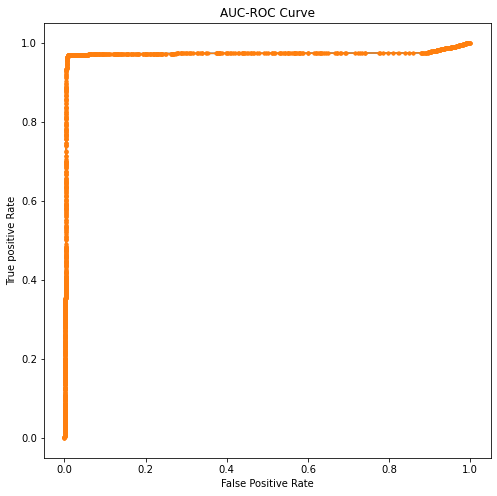

In [246]:
plt.plot(fpr,tpr)
plt.plot(fpr,tpr,marker=".")
plt.xlabel("False Positive Rate")
plt.ylabel("True positive Rate")
plt.title("AUC-ROC Curve")

In [247]:
nb_f1=f1_score(u_y_test, nb_p1, average="macro")
nb_pr1=precision_score(u_y_test,nb_p1, average="macro")
nb_r1=recall_score(u_y_test,nb_p1, average="macro")

# Conclusion

In [248]:
list1=["Logistic Regression","Decision Tree","Random Forest","Ada Boost","XG Boost","SVM","KNN","Naive Bayes"] 
list2=[lg_ac1,dt_ac1,rf_ac1,ab_ac1,xg_ac1,sv_ac1,kn_ac1,nb_ac1] 
list3=[lg_pr1,dt_pr1,rf_pr1,ab_pr1,xg_pr1,sv_pr1,kn_pr1,nb_pr1]
list4=[lg_r1,dt_r1,rf_r1,ab_r1,xg_r1,sv_r1,kn_r1,nb_r1]
list5=[lg_f1,dt_f1,rf_f1,ab_f1,xg_f1,sv_f1,kn_f1,nb_f1]

In [249]:
df1=pd.DataFrame({"Model Name":list1, "Accuracy":list2, "Precision":list3, "Recall":list4, "F1-Score":list5})
df1 

,Model Name,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,78.716789,0.787168,0.787168,0.787168
1,Decision Tree,100.000000,1.000000,1.000000,1.000000
2,Random Forest,99.994347,0.999944,0.999943,0.999943
3,Ada Boost,100.000000,1.000000,1.000000,1.000000
4,XG Boost,100.000000,1.000000,1.000000,1.000000
5,SVM,66.834370,0.668633,0.668360,0.668215
6,KNN,86.568683,0.874897,0.865625,0.864843
7,Naive Bayes,93.612210,0.942563,0.936074,0.935884


In [250]:
df

,Model Name,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,80.672586,0.797887,0.780268,0.787021
1,Decision Tree,100.000000,1.000000,1.000000,1.000000
2,Random Forest,99.991624,0.999933,0.999887,0.999910
3,Ada Boost,100.000000,1.000000,1.000000,1.000000
4,XG Boost,100.000000,1.000000,1.000000,1.000000
5,SVM,71.764804,0.742276,0.638547,0.637201
6,KNN,86.112740,0.871700,0.829293,0.843260
7,Naive Bayes,81.698635,0.883547,0.754009,0.773424
